# Assignment 3
## 1. Prediction Task

In [1]:
import os
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import ttest_rel

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression



In [2]:
np.random.seed(42)  # for reproducibility
# Get the current working directory
current_directory = os.getcwd()

# Construct the relative path to dataset file
dataset1_file_name = "DataTrain-2.csv"
dataset1_file_path = os.path.join(current_directory, dataset1_file_name)

# Read the CSV file
dataset1 = pd.read_csv(dataset1_file_path, delimiter=',')

dataset1

engine_id  cycle   set1    set2    set3  sensor_val1  sensor_val2  \
0              1      1  100.0 -0.0007 -0.0004      9046.19       521.66   
1              1      2  100.0  0.0019 -0.0003      9044.07       522.28   
2              1      3  100.0 -0.0043  0.0003      9052.94       522.42   
3              1      4  100.0  0.0007  0.0000      9049.48       522.86   
4              1      5  100.0 -0.0019 -0.0002      9055.15       522.19   
...          ...    ...    ...     ...     ...          ...          ...   
20626        100    196  100.0 -0.0004 -0.0003      9065.52       519.49   
20627        100    197  100.0 -0.0016 -0.0005      9065.11       519.68   
20628        100    198  100.0  0.0004  0.0000      9065.90       520.01   
20629        100    199  100.0 -0.0011  0.0003      9073.72       519.67   
20630        100    200  100.0 -0.0032 -0.0005      9061.48       519.30   

       sensor_val3  sensor_val4  sensor_val5  ...  sensor_val12  sensor_val13  \
0          8138.62      1589.70       554.36  ...           392       2388.06   
1          8131.49      1591.82       553.75  ...           392       2388.04   
2          8133.23      1587.99       554.26  ...           390       2388.08   
3          8133.83      1582.79       554.45  ...           392       2388.11   
4          8133.80      1582.85       554.00  ...           393       2388.06   
...            ...          ...          ...  ...           ...           ...   
20626      8137.60      1597.98       551.43  ...           397       2388.19   
20627      8136.50      1604.50       550.86  ...           395       2388.23   
20628      8141.05      1602.46       550.94  ...           398       2388.24   
20629      8139.29      1605.26       550.68  ...           395       2388.25   
20630      8137.33      1600.38       550.79  ...           396       2388.26   

       sensor_val14  sensor_val15  sensor_val16  sensor_val17  sensor_val18  \
0               1.3        641.82          2388        8.4195         21.61   
1               1.3        642.15          2388        8.4318         21.61   
2               1.3        642.35          2388        8.4178         21.61   
3               1.3        642.35          2388        8.3682         21.61   
4               1.3        642.37          2388        8.4294         21.61   
...             ...           ...           ...           ...           ...   
20626           1.3        643.49          2388        8.4956         21.61   
20627           1.3        643.54          2388        8.5139         21.61   
20628           1.3        643.42          2388        8.5646         21.61   
20629           1.3        643.23          2388        8.5389         21.61   
20630           1.3        643.85          2388        8.5036         21.61   

       sensor_val19  sensor_val20  sensor_val21  
0             47.47         14.62       23.4190  
1             47.49         14.62       23.4236  
2             47.27         14.62       23.3442  
3             47.13         14.62       23.3739  
4             47.28         14.62       23.4044  
...             ...           ...           ...  
20626         48.07         14.62       22.9735  
20627         48.04         14.62       23.1594  
20628         48.09         14.62       22.9333  
20629         48.39         14.62       23.0640  
20630         48.20         14.62       23.0522  

[20631 rows x 26 columns]

In this assignment, we will consider a maintenance scheduling problem for airplane engines. Engines are subject to wear and tear over time. A key quantity of interest for machines like engines is called the remaining useful lifetime or RUL for short. In this assignment, you will develop a predictive model that predicts the RUL for engines that are currently in use. Using an engine beyond its RUL is not safe and therefore there are costs associated with this. The only way to ensure that an engine is safe for use is to perform maintenance on it. Given an estimate of the RUL, company X needs to decide on a maintenance schedule so that it can maintain the engines in a timely fashion in order to avoid the aforementioned costs.

DataTrain.csv. This is a csv-file that contains data for 100 engines. We will use this data to develop our predictive model. We will refer to this data as dataset 1.

This dataset contains run-to-failure data for a number of engines. Engines in dataset 1 are considered to start with various degrees of initial wear but are considered healthy at the start of each record. As the number of cycles increases the engines begin to deteriorate until they can no longer function. At this point in time (when the engines can no longer function) the engines are considered unhealthy and cannot perform their intended function. A description of the variables in this dataset is given in Table 1

In [3]:
dataset1.dtypes

engine_id         int64
cycle             int64
set1            float64
set2            float64
set3            float64
sensor_val1     float64
sensor_val2     float64
sensor_val3     float64
sensor_val4     float64
sensor_val5     float64
sensor_val6     float64
sensor_val7     float64
sensor_val8     float64
sensor_val9     float64
sensor_val10    float64
sensor_val11    float64
sensor_val12      int64
sensor_val13    float64
sensor_val14    float64
sensor_val15    float64
sensor_val16      int64
sensor_val17    float64
sensor_val18    float64
sensor_val19    float64
sensor_val20    float64
sensor_val21    float64
dtype: object

In [4]:
dataset1.describe()

engine_id         cycle     set1          set2          set3  \
count  20631.000000  20631.000000  20631.0  20631.000000  20631.000000   
mean      51.506568    108.807862    100.0     -0.000009      0.000002   
std       29.227633     68.880990      0.0      0.002187      0.000293   
min        1.000000      1.000000    100.0     -0.008700     -0.000600   
25%       26.000000     52.000000    100.0     -0.001500     -0.000200   
50%       52.000000    104.000000    100.0      0.000000      0.000000   
75%       77.000000    156.000000    100.0      0.001500      0.000300   
max      100.000000    362.000000    100.0      0.008700      0.000600   

        sensor_val1   sensor_val2   sensor_val3   sensor_val4   sensor_val5  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean    9065.242941    521.413470   8143.752722   1590.523119    553.367711   
std       22.082880      0.737553     19.076176      6.131150      0.885092   
min     9021.730000    518.690000   8099.940000   1571.040000    549.850000   
25%     9053.100000    520.960000   8133.245000   1586.260000    552.810000   
50%     9060.660000    521.480000   8140.540000   1590.100000    553.440000   
75%     9069.420000    521.950000   8148.310000   1594.380000    554.010000   
max     9244.590000    523.380000   8293.720000   1616.910000    556.060000   

       ...  sensor_val12  sensor_val13  sensor_val14  sensor_val15  \
count  ...  20631.000000  20631.000000  2.063100e+04  20631.000000   
mean   ...    393.210654   2388.096652  1.300000e+00    642.680934   
std    ...      1.548763      0.070985  4.660829e-13      0.500053   
min    ...    388.000000   2387.900000  1.300000e+00    641.210000   
25%    ...    392.000000   2388.050000  1.300000e+00    642.325000   
50%    ...    393.000000   2388.090000  1.300000e+00    642.640000   
75%    ...    394.000000   2388.140000  1.300000e+00    643.000000   
max    ...    400.000000   2388.560000  1.300000e+00    644.530000   

       sensor_val16  sensor_val17  sensor_val18  sensor_val19  sensor_val20  \
count       20631.0  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean         2388.0      8.442146     21.609803     47.541168  1.462000e+01   
std             0.0      0.037505      0.001389      0.267087  3.394700e-12   
min          2388.0      8.324900     21.600000     46.850000  1.462000e+01   
25%          2388.0      8.414900     21.610000     47.350000  1.462000e+01   
50%          2388.0      8.438900     21.610000     47.510000  1.462000e+01   
75%          2388.0      8.465600     21.610000     47.700000  1.462000e+01   
max          2388.0      8.584800     21.610000     48.530000  1.462000e+01   

       sensor_val21  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400  

[8 rows x 26 columns]

The interpretation of the data rows is as follows. For example, the engine with engine id 1, was working for 192 cycles and then it failed. So, (i) at cycle 191 the RUL for engine with engine id 1 was equal to 1; (ii) at cycle 190 the RUL for engine with engine id 1 was equal to 2.

100 engines (100 id)

# 1.1 Modeling
## 1.1.1 Data Preprocessing: Feature Creation

In [5]:
# Create a new feature of the highest cycle number for each engine id in the dataset1
dataset1['max_cycle'] = dataset1.groupby('engine_id')['cycle'].transform('max')

In [6]:
# Calculate the Remaining Useful Life (RUL) for each cycle
dataset1['RUL'] = dataset1['max_cycle'] - dataset1['cycle']

In [7]:
print(dataset1.head())

   engine_id  cycle   set1    set2    set3  sensor_val1  sensor_val2  \
0          1      1  100.0 -0.0007 -0.0004      9046.19       521.66   
1          1      2  100.0  0.0019 -0.0003      9044.07       522.28   
2          1      3  100.0 -0.0043  0.0003      9052.94       522.42   
3          1      4  100.0  0.0007  0.0000      9049.48       522.86   
4          1      5  100.0 -0.0019 -0.0002      9055.15       522.19   

   sensor_val3  sensor_val4  sensor_val5  ...  sensor_val14  sensor_val15  \
0      8138.62      1589.70       554.36  ...           1.3        641.82   
1      8131.49      1591.82       553.75  ...           1.3        642.15   
2      8133.23      1587.99       554.26  ...           1.3        642.35   
3      8133.83      1582.79       554.45  ...           1.3        642.35   
4      8133.80      1582.85       554.00  ...           1.3        642.37   

   sensor_val16  sensor_val17  sensor_val18  sensor_val19  sensor_val20  \
0          2388        8.4195

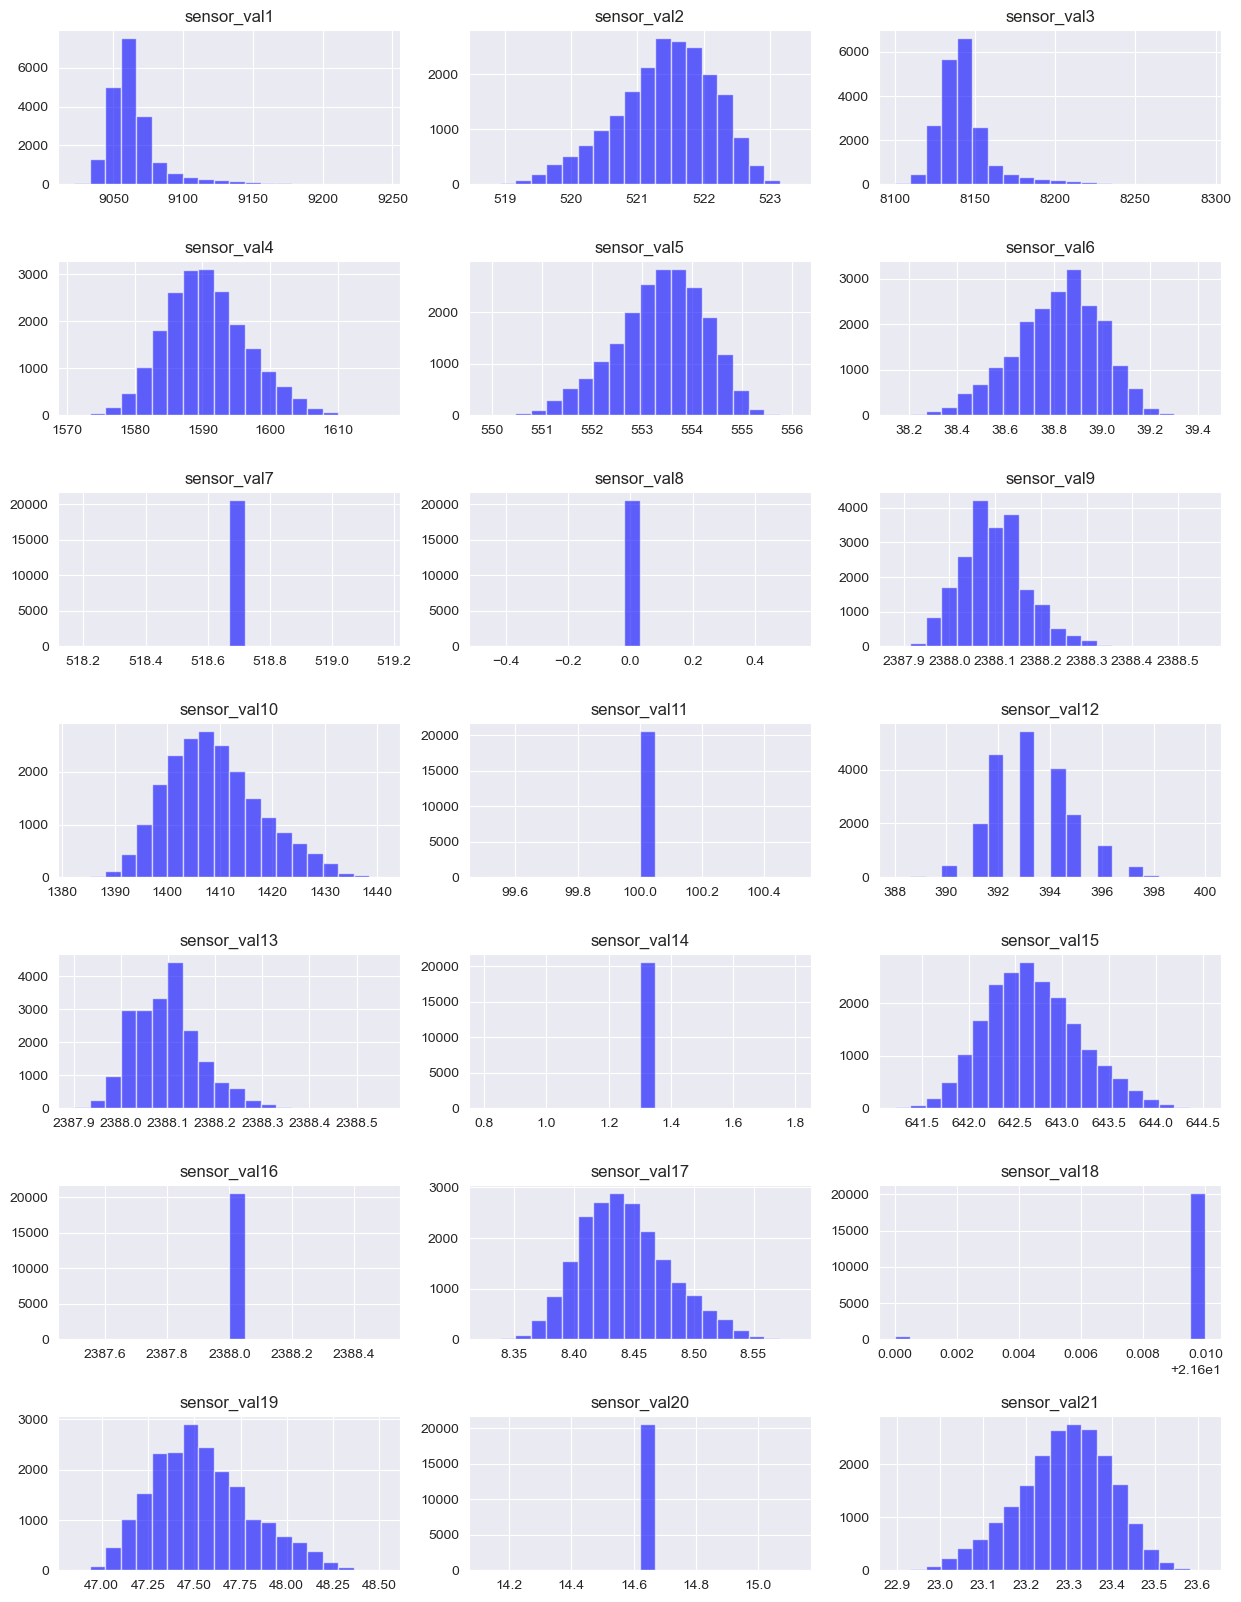

In [8]:
# Plotting histograms of the sensor measurements to understand their distributions
fig, axs = plt.subplots(7, 3, figsize=(15, 20))
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()

for i in range(21):
    axs[i].hist(dataset1[f'sensor_val{i+1}'].dropna(), bins=20, alpha=0.6, color='b')
    axs[i].set_title(f'sensor_val{i+1}')

plt.show()

This visualisation shows the distribution of values for each of the 21 sensor measurements across the dataset. Each histogram represents the frequency of data points within specific ranges for a single sensor.

Histograms help in understanding the underlying distribution of sensor data, such as identifying skewness, detecting outliers, and seeing whether the data follows a normal distribution. This insight is crucial when deciding on data preprocessing steps like scaling, normalisation, or outlier removal and can indicate the variability and reliability of each sensor as a feature.

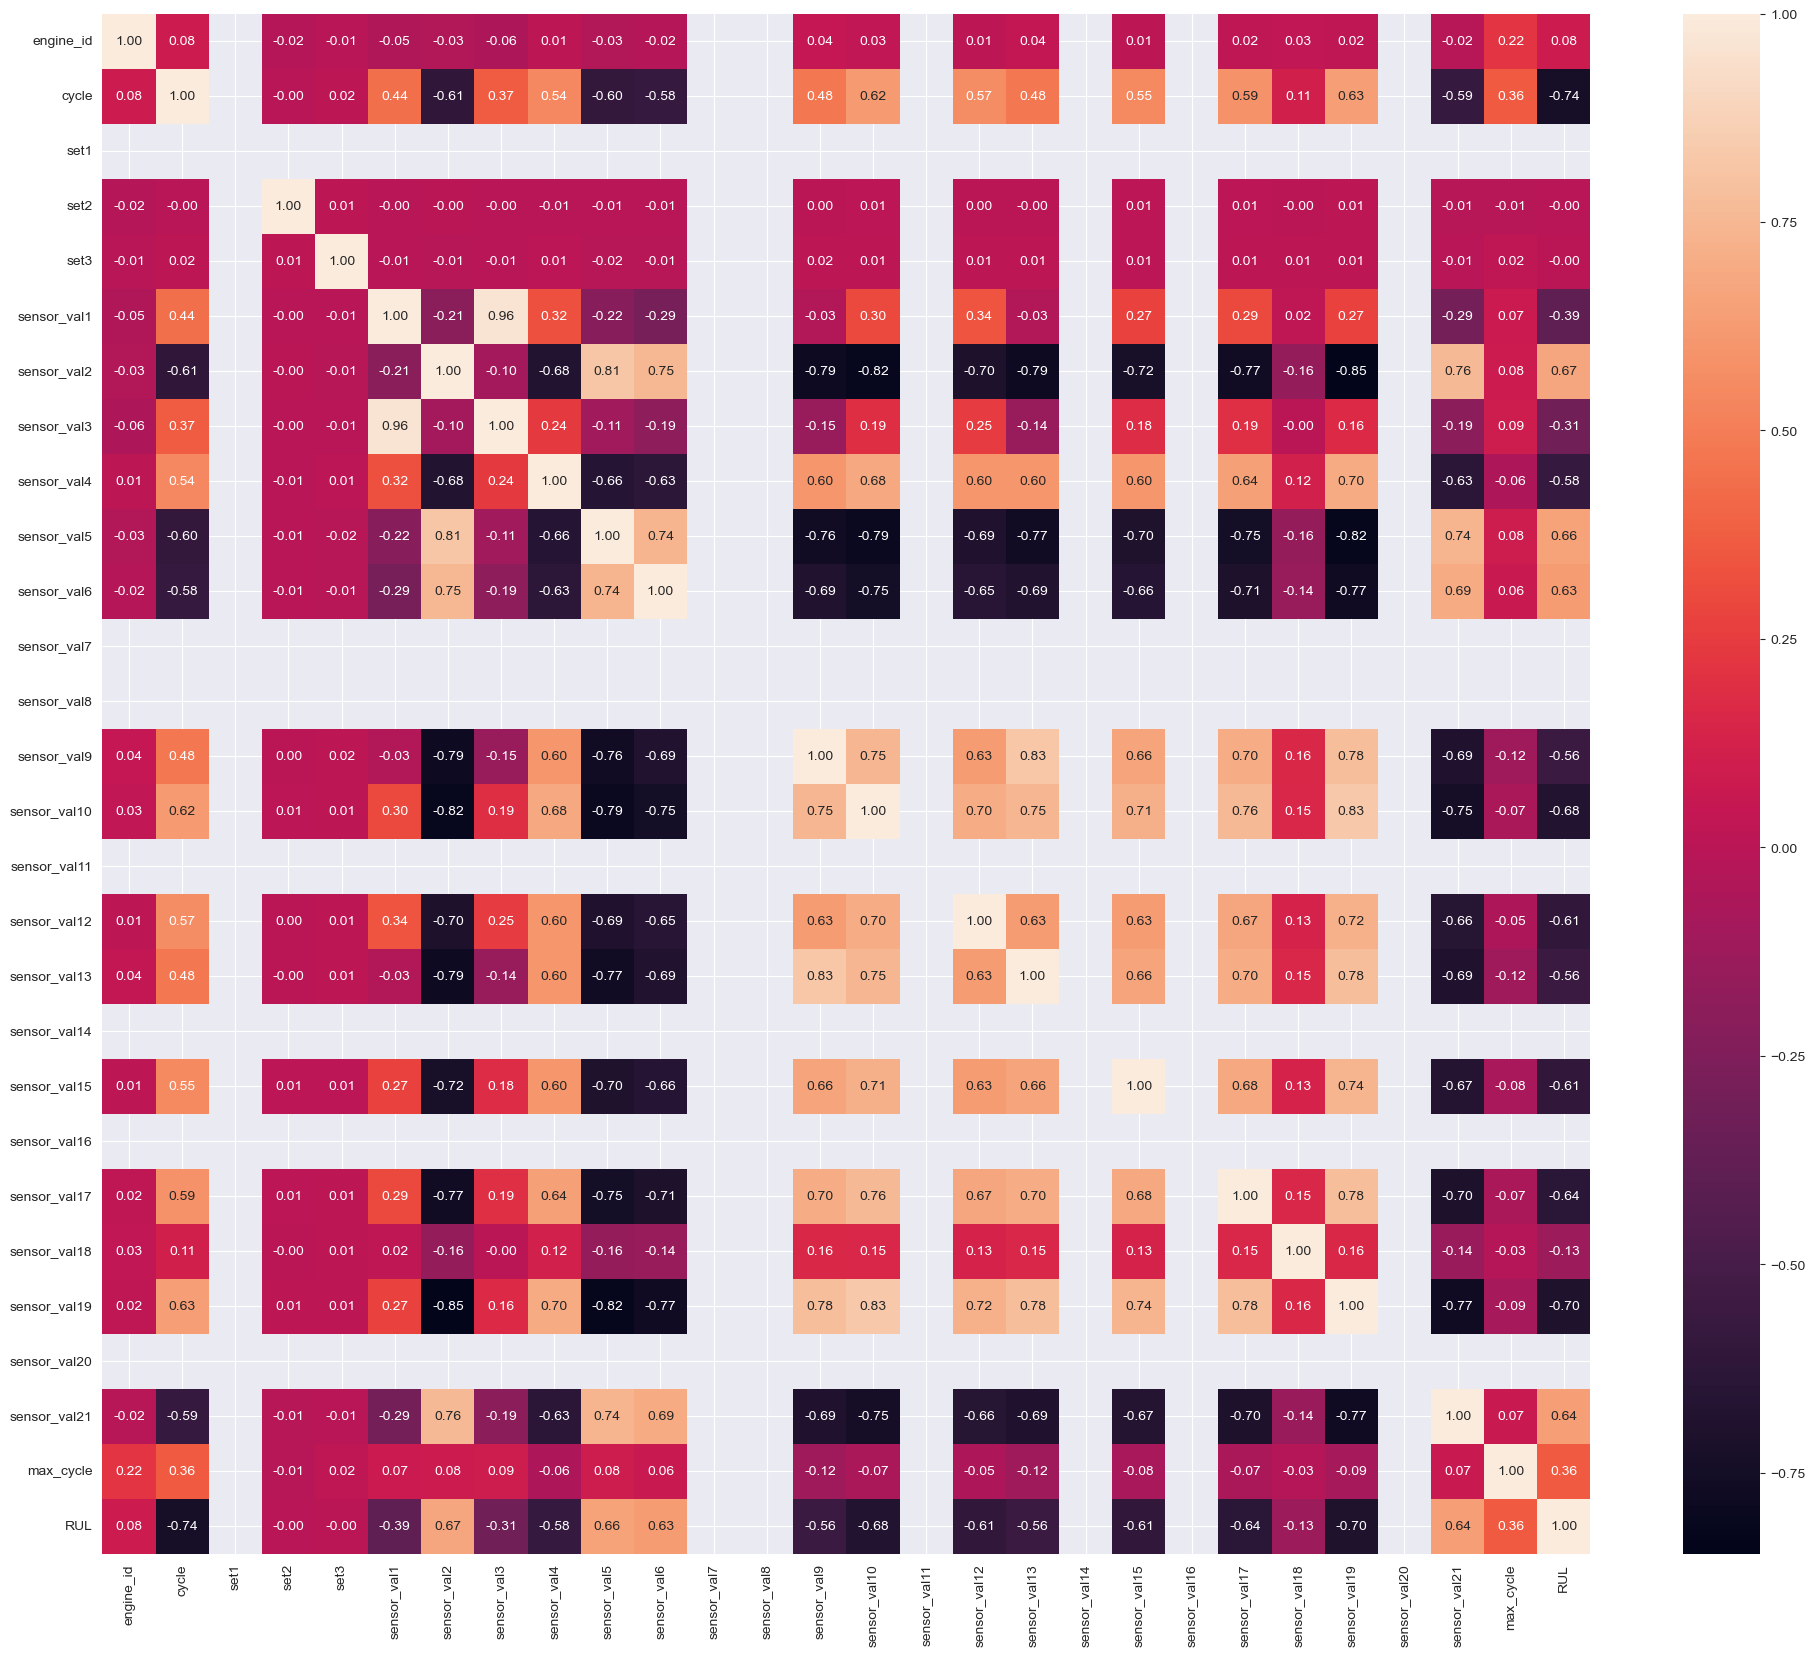

In [9]:
# Plotting correlation matrix to find potential predictors
correlation_matrix = dataset1.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

A heatmap of the correlation coefficients between all pairs of features, including RUL and sensor readings. Each cell in the heatmap shows how strongly two variables are related, where cells closer to 1 or -1 indicate a strong positive or negative correlation, respectively.

The correlation matrix is key to identifying features that have a strong relationship with the RUL, which can be potent predictors in the predictive model. It also helps in spotting multicollinearity (high correlation between predictor variables), which could be problematic for the model by causing overfitting or inflated importance of certain features.

In [10]:
# Analyse the correlation of RUL with other features
rul_correlation = correlation_matrix['RUL'].sort_values(ascending=False)
print(rul_correlation)

RUL             1.000000
sensor_val2     0.671983
sensor_val5     0.657223
sensor_val21    0.635662
sensor_val6     0.629428
max_cycle       0.363152
engine_id       0.078753
set3           -0.001948
set2           -0.003198
sensor_val18   -0.128348
sensor_val3    -0.306769
sensor_val1    -0.390102
sensor_val9    -0.562569
sensor_val13   -0.563968
sensor_val4    -0.584520
sensor_val12   -0.606154
sensor_val15   -0.606484
sensor_val17   -0.642667
sensor_val10   -0.678948
sensor_val19   -0.696228
cycle          -0.736241
set1                 NaN
sensor_val7          NaN
sensor_val8          NaN
sensor_val11         NaN
sensor_val14         NaN
sensor_val16         NaN
sensor_val20         NaN
Name: RUL, dtype: float64


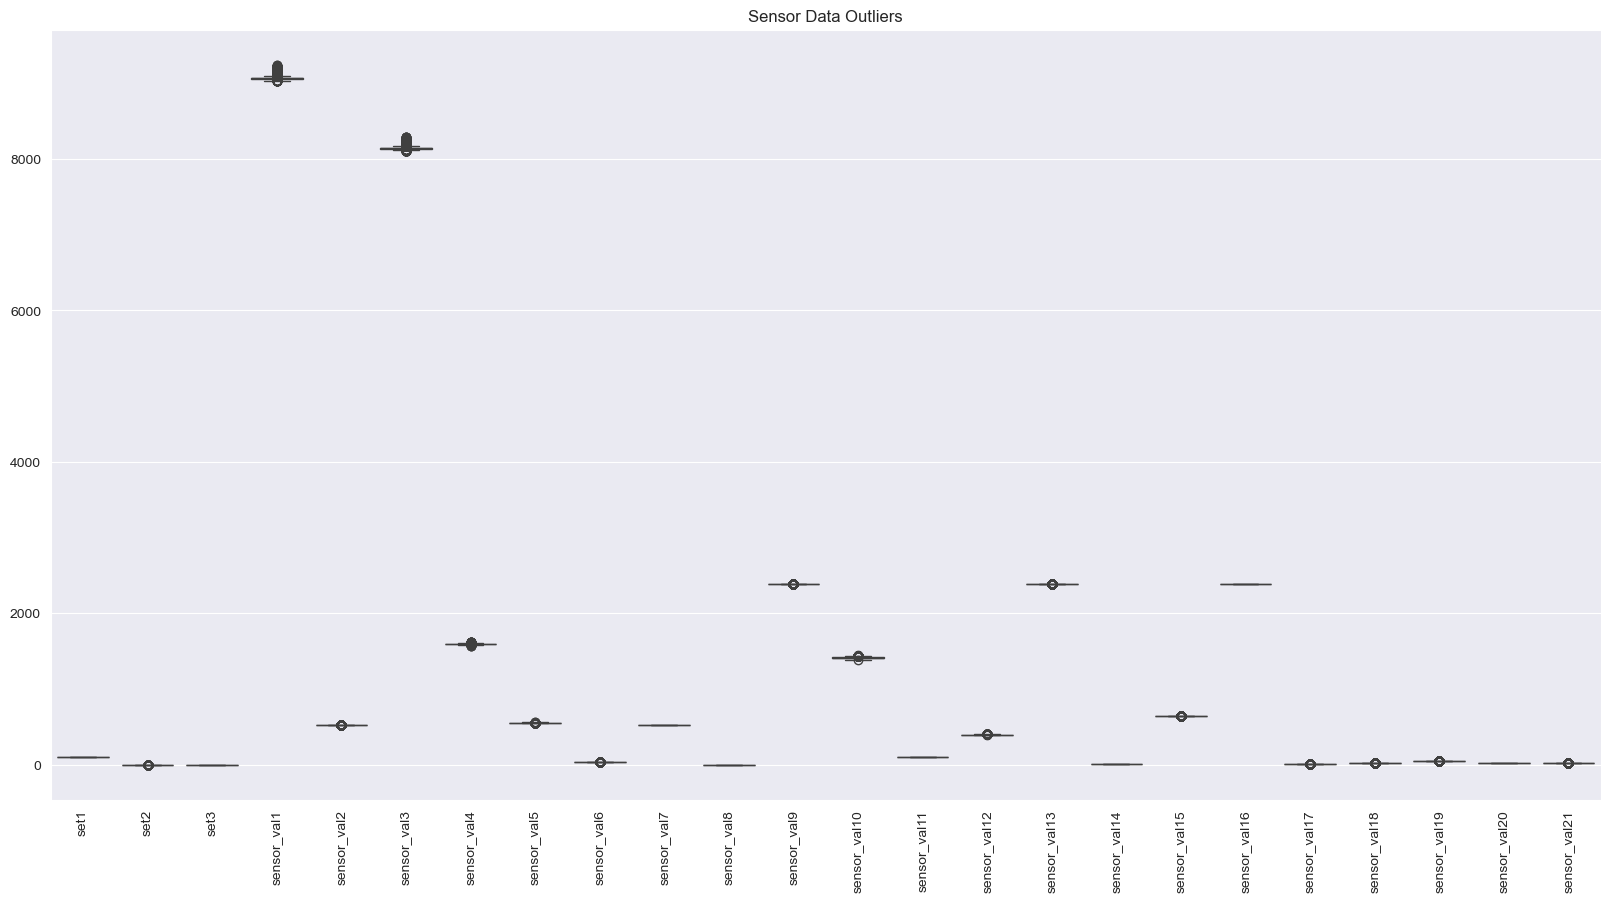

In [11]:
# Boxplot to check for outliers in sensor data
plt.figure(figsize=(20,10))
sns.boxplot(data=dataset1.iloc[:, 2:26])  # Adjust columns as per your dataset
plt.xticks(rotation=90)
plt.title('Sensor Data Outliers')
plt.show()

Boxplots for each sensor measurement showing the median, quartiles, and outliers. These plots provide a summary of the distribution of each sensor’s measurements.

Boxplots are essential for quickly spotting outliers and the spread of the measurements in each sensor. Outliers can significantly affect model performance, especially in regression tasks, and may need to be addressed either through transformations or by other methods like clipping or removal. Understanding the spread and central tendency helps in gauging data quality and distribution characteristics.

In [12]:
# Checking for missing values in the dataset
print(dataset1.isnull().sum())

engine_id       0
cycle           0
set1            0
set2            0
set3            0
sensor_val1     0
sensor_val2     0
sensor_val3     0
sensor_val4     0
sensor_val5     0
sensor_val6     0
sensor_val7     0
sensor_val8     0
sensor_val9     0
sensor_val10    0
sensor_val11    0
sensor_val12    0
sensor_val13    0
sensor_val14    0
sensor_val15    0
sensor_val16    0
sensor_val17    0
sensor_val18    0
sensor_val19    0
sensor_val20    0
sensor_val21    0
max_cycle       0
RUL             0
dtype: int64


Identifying missing data is crucial before modeling because the presence of missing values can skew the analysis and might lead to biased or incorrect model predictions. Knowing where these gaps are helps decide on the best strategy for handling them, such as imputation or exclusion.

dataset1 is our full training data. The outcome varaible: URL need to be created url = max_cycle - current cycle

In [13]:
# generate a feature  for the remaining cycles (ur) for each cycle based on the max cycle number for each engine id in dataset1
dataset1['RUL'] = dataset1['max_cycle'] - dataset1['cycle']
dataset1.shape

(20631, 28)

## 1.1.2 Developing a Random Forest model

In [14]:
# Labels are the values we want to predict: RUL
labels = dataset1['RUL']

# Remove the labels and 'max_cycle' from the features
dataset1 = dataset1.drop('RUL', axis = 1)
dataset1 = dataset1.drop('max_cycle', axis = 1)
dataset1 = dataset1.drop('engine_id', axis = 1)

# Saving feature names for later use
feature_list = list(dataset1.columns)

labels.shape, dataset1.shape

((20631,), (20631, 25))

### Train-Test Split

In [15]:
# Split into features (X) and target (y)
X = dataset1
y = labels

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (16504, 25)
Training Labels Shape: (16504,)
Testing Features Shape: (4127, 25)
Testing Labels Shape: (4127,)


## Training the Random Forest Model
### a. Base model

In [16]:
# Initialize the Random Forest Regressor - a base model
base_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
# Train the model on the training data
base_model.fit(x_train, y_train)

# Predict RUL on the test data
y_pred = base_model.predict(x_test)

In [17]:
 # Evaluate model performance
def evaluate(model, test_features, test_labels):
    """Evaluates the model performance on the test set."""
    prediction = model.predict(test_features)
   # errors = abs(prediction - test_labels)
   # mape = 100 * np.mean(errors / np.mean(test_labels))    
    mse = mean_squared_error(test_labels, prediction)   
    rmse = np.sqrt(mse)
    
    return 'MSE = {:0.2f}.'.format(mse),'RMSE = {:0.2f}.'.format(rmse)

In [18]:
evaluate(base_model, x_test, y_test)

('MSE = 1278.43.', 'RMSE = 35.76.')

In [19]:
# Cross validation
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse = make_scorer(rmse_score, greater_is_better=False)

# Set up K-Fold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and collect scores
cv_scores = cross_val_score(base_model, x_train, y_train, cv=kf, scoring=rmse)

# Output the scores and their mean/standard deviation
print(f"Cross-Validation RMSE Scores: {np.abs(cv_scores)}")
print(f"Mean RMSE: {np.abs(cv_scores).mean():.4f}")
print(f"Standard Deviation of RMSE: {np.abs(cv_scores).std():.4f}")

Cross-Validation RMSE Scores: [36.18619294 36.03045925 36.86547008 35.47739829 36.59264305]
Mean RMSE: 36.2304
Standard Deviation of RMSE: 0.4782


In [20]:
# Print the parameters currently in use
print('Parameters currently in use:\n')
pprint(base_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [21]:
# Feature importance
f_importances = base_model.feature_importances_
feature_importance = pd.Series(f_importances, index= feature_list).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 cycle           0.555699
sensor_val19    0.144818
sensor_val1     0.041984
sensor_val10    0.038965
sensor_val2     0.030839
sensor_val3     0.023506
sensor_val5     0.022436
sensor_val17    0.019959
sensor_val21    0.018742
sensor_val15    0.017787
sensor_val4     0.017482
set2            0.014035
sensor_val6     0.013920
sensor_val13    0.013304
sensor_val9     0.012668
set3            0.008612
sensor_val12    0.004953
sensor_val18    0.000290
sensor_val7     0.000000
sensor_val8     0.000000
set1            0.000000
sensor_val11    0.000000
sensor_val14    0.000000
sensor_val16    0.000000
sensor_val20    0.000000
dtype: float64


### b. GridSearchCV

In [22]:
# Define Grid 
grid = { 
    
    'n_estimators': [70, 80, 90, 100],
    'ccp_alpha':  [0],
    'max_leaf_nodes': [None],
    'max_samples': [None],
    'max_features': [1],
    'max_depth' : [None],
    'random_state' : [18],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}
# Show start time
print(datetime.now())

# Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid= grid, cv= 5)
CV_rfr.fit(x_train, y_train)
# Show end time
print(datetime.now())

2024-05-18 20:39:19.006142
2024-05-18 20:41:03.640898


In [23]:
best_params = CV_rfr.best_params_
print("Best Hyperparameters:", CV_rfr.best_params_)

Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0, 'max_depth': None, 'max_features': 1, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 18}


In [24]:
# Initialize a new model with these parameters
best_model_grid = RandomForestRegressor(**best_params)

# Fit this new model on the entire training data
best_model_grid.fit(x_train, y_train)

# Make predictions with the new model
y_pred = best_model_grid.predict(x_test)

# Evaluate the performance of the best model 
evaluate(best_model_grid, x_test, y_test)

('MSE = 1353.00.', 'RMSE = 36.78.')

### c. Random Search

In [25]:
# Hyperparameter tuning - Randomized Search 
# Define the parameter distribution
param_dist = {
    'n_estimators': [900, 920, 930, 940],
    'max_depth': [10, None],
    'max_samples': [1,None],
    'max_features': ['sqrt', 'log2', 1],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Show start time
print(datetime.now())

# Initialize the RandomizedSearchCV with a RandomForestRegressor
random_search = RandomizedSearchCV(estimator= base_model,
                                   param_distributions= param_dist, scoring = 'neg_mean_squared_error', n_iter=100, cv=5, n_jobs=4, verbose=0, random_state=42)

# Fit the randomized search to your data
random_search.fit(x_train, y_train)
# Show end time
print(datetime.now())


2024-05-18 20:41:04.815720


/Users/orcunkarabicak/miniconda3/envs/JADS-PresAlgo/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/orcunkarabicak/miniconda3/envs/JADS-PresAlgo/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/orcunkarabicak/miniconda3/envs/JADS-PresAlgo/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_an

2024-05-18 20:56:26.319242


In [26]:
# Best parameters
best__params_random = random_search.best_params_
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 930, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_samples': None, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [27]:
# Initialize a new model with these parameters
best_model_random = RandomForestRegressor(**best__params_random)

# Fit this new model on the entire training data
best_model_random.fit(x_train, y_train)

# Make predictions with the new model
y_pred = best_model_random.predict(x_test)

# Evaluate the performance of the best model 
evaluate(best_model_random, x_test, y_test)

('MSE = 1247.23.', 'RMSE = 35.32.')

# 1.2 Prediction
## 1.2.1 Predicting 
Using predictive model to predict the RULs for the engines in "data set 2" which are not known. These integer-valued predictions will be used in the subsequent tasks.

In [28]:
# Construct the relative path to dataset file
dataset2_file_name = "DataSchedule-2.csv"
dataset2_file_path = os.path.join(current_directory, dataset2_file_name)

# Read the CSV file
dataset2 = pd.read_csv(dataset2_file_path, delimiter=',')

dataset2

engine_id  cycle   set1    set2    set3  sensor_val1  sensor_val2  \
0              1      1  100.0  0.0023  0.0003      9050.17       521.72   
1              1      2  100.0 -0.0027 -0.0003      9054.42       522.16   
2              1      3  100.0  0.0003  0.0001      9056.96       521.97   
3              1      4  100.0  0.0042  0.0000      9045.29       521.38   
4              1      5  100.0  0.0014  0.0000      9044.55       522.15   
...          ...    ...    ...     ...     ...          ...          ...   
13091        100    194  100.0  0.0049  0.0000      9142.37       520.69   
13092        100    195  100.0 -0.0011 -0.0001      9140.68       521.05   
13093        100    196  100.0 -0.0006 -0.0003      9146.81       521.18   
13094        100    197  100.0 -0.0038  0.0001      9148.85       521.33   
13095        100    198  100.0  0.0013  0.0003      9155.03       521.07   

       sensor_val3  sensor_val4  sensor_val5  ...  sensor_val12  sensor_val13  \
0          8125.55      1585.29       553.90  ...           392       2388.04   
1          8139.62      1588.45       554.85  ...           393       2388.01   
2          8130.10      1586.94       554.11  ...           393       2388.05   
3          8132.90      1584.12       554.07  ...           391       2388.03   
4          8129.54      1587.19       554.16  ...           390       2388.01   
...            ...          ...          ...  ...           ...           ...   
13091      8213.28      1599.45       553.41  ...           394       2388.02   
13092      8210.85      1595.69       553.22  ...           395       2388.05   
13093      8217.24      1593.15       553.04  ...           395       2388.11   
13094      8220.48      1594.99       553.37  ...           395       2388.07   
13095      8214.64      1601.62       552.48  ...           396       2388.06   

       sensor_val14  sensor_val15  sensor_val16  sensor_val17  sensor_val18  \
0               1.3        643.02          2388        8.4052         21.61   
1               1.3        641.71          2388        8.3803         21.61   
2               1.3        642.46          2388        8.4441         21.61   
3               1.3        642.44          2388        8.3917         21.61   
4               1.3        642.51          2388        8.4031         21.61   
...             ...           ...           ...           ...           ...   
13091           1.3        643.24          2388        8.4715         21.61   
13092           1.3        643.22          2388        8.4512         21.61   
13093           1.3        643.44          2388        8.4569         21.61   
13094           1.3        643.26          2388        8.4711         21.61   
13095           1.3        642.95          2388        8.4903         21.61   

       sensor_val19  sensor_val20  sensor_val21  
0             47.20         14.62       23.3735  
1             47.50         14.62       23.3916  
2             47.50         14.62       23.4166  
3             47.28         14.62       23.3737  
4             47.31         14.62       23.4130  
...             ...           ...           ...  
13091         47.69         14.62       23.1974  
13092         47.60         14.62       23.2771  
13093         47.57         14.62       23.2051  
13094         47.61         14.62       23.2699  
13095         47.80         14.62       23.1855  

[13096 rows x 26 columns]

In [29]:
# Drop the engine)id column
dataset2_drop_id = dataset2.drop('engine_id', axis = 1)

# Use the best model to predict the RUL for the dataset2, make the 'RUL' in integer format
dataset2_drop_id['RUL'] = best_model_random.predict(dataset2_drop_id).astype(int)

# Combine dataset2_drop_id with the engine_id
dataset2['RUL'] = dataset2_drop_id['RUL']

dataset2

engine_id  cycle   set1    set2    set3  sensor_val1  sensor_val2  \
0              1      1  100.0  0.0023  0.0003      9050.17       521.72   
1              1      2  100.0 -0.0027 -0.0003      9054.42       522.16   
2              1      3  100.0  0.0003  0.0001      9056.96       521.97   
3              1      4  100.0  0.0042  0.0000      9045.29       521.38   
4              1      5  100.0  0.0014  0.0000      9044.55       522.15   
...          ...    ...    ...     ...     ...          ...          ...   
13091        100    194  100.0  0.0049  0.0000      9142.37       520.69   
13092        100    195  100.0 -0.0011 -0.0001      9140.68       521.05   
13093        100    196  100.0 -0.0006 -0.0003      9146.81       521.18   
13094        100    197  100.0 -0.0038  0.0001      9148.85       521.33   
13095        100    198  100.0  0.0013  0.0003      9155.03       521.07   

       sensor_val3  sensor_val4  sensor_val5  ...  sensor_val13  sensor_val14  \
0          8125.55      1585.29       553.90  ...       2388.04           1.3   
1          8139.62      1588.45       554.85  ...       2388.01           1.3   
2          8130.10      1586.94       554.11  ...       2388.05           1.3   
3          8132.90      1584.12       554.07  ...       2388.03           1.3   
4          8129.54      1587.19       554.16  ...       2388.01           1.3   
...            ...          ...          ...  ...           ...           ...   
13091      8213.28      1599.45       553.41  ...       2388.02           1.3   
13092      8210.85      1595.69       553.22  ...       2388.05           1.3   
13093      8217.24      1593.15       553.04  ...       2388.11           1.3   
13094      8220.48      1594.99       553.37  ...       2388.07           1.3   
13095      8214.64      1601.62       552.48  ...       2388.06           1.3   

       sensor_val15  sensor_val16  sensor_val17  sensor_val18  sensor_val19  \
0            643.02          2388        8.4052         21.61         47.20   
1            641.71          2388        8.3803         21.61         47.50   
2            642.46          2388        8.4441         21.61         47.50   
3            642.44          2388        8.3917         21.61         47.28   
4            642.51          2388        8.4031         21.61         47.31   
...             ...           ...           ...           ...           ...   
13091        643.24          2388        8.4715         21.61         47.69   
13092        643.22          2388        8.4512         21.61         47.60   
13093        643.44          2388        8.4569         21.61         47.57   
13094        643.26          2388        8.4711         21.61         47.61   
13095        642.95          2388        8.4903         21.61         47.80   

       sensor_val20  sensor_val21  RUL  
0             14.62       23.3735  196  
1             14.62       23.3916  207  
2             14.62       23.4166  198  
3             14.62       23.3737  201  
4             14.62       23.4130  213  
...             ...           ...  ...  
13091         14.62       23.1974   25  
13092         14.62       23.2771   28  
13093         14.62       23.2051   30  
13094         14.62       23.2699   27  
13095         14.62       23.1855   17  

[13096 rows x 27 columns]

## 1.2.2 Compare Predictions
We will compare our predictions with that of an external data set produced by a consultancy company. This data set can be found in RUL consultancy predictions A3.csv. The idea is to see whether our predictions are significantly different from the consultancy’s.

In [30]:
# Construct the relative path to dataset file
dataset3_file_name = "RUL_consultancy_predictions_A3-2.csv"
dataset3_file_path = os.path.join(current_directory, dataset3_file_name)

# Read RUL consultancy predictions A3.csv
dataset3 = pd.read_csv(dataset3_file_path, delimiter=';')

# Convert 'RUL' and 'id' columns to appropriate data types (integers)
dataset3['RUL'] = pd.to_numeric(dataset3['RUL'])
dataset3['id'] = pd.to_numeric(dataset3['id'])

dataset3

RUL   id
0   135    1
1   125    2
2    63    3
3   100    4
4   103    5
..  ...  ...
95  140   96
96  109   97
97   87   98
98  127   99
99   24  100

[100 rows x 2 columns]

Our random forest predictions are based on the cycles for each engine. However, the consultancy company's prediction is a single RUL value per engine. We need to find a single RUL value to use in the optimization task. We decided to use the following two approaches: Weighted Average Based on Cycle Number and Linear Regression. We will compare each method's outcomes with consultancy company predictions using MSE and RMSE to determine which one is closer. After selecting the best approach, we will implement a paired sample t-test evaluate whether our predictions are significantly different from the consultancy’s.

## Method 1: Weihgted Average Based on Cycle Number

In [31]:
# Method 1: Weighted Average 
# Make a copy of the dataset2
w_avg_rul_df= dataset2.copy()
# Compute weights based on the cycle number
w_avg_rul_df['weight'] = w_avg_rul_df['cycle'] / w_avg_rul_df.groupby('engine_id')['cycle'].transform('max')
# Multiply predicted RUL by the calculated weight
w_avg_rul_df['weighted_rul'] = w_avg_rul_df['RUL'] * w_avg_rul_df['weight']

# Function to compute weighted average for each engine_id
def weighted_avg(group):
    return group['weighted_rul'].sum() / group['weight'].sum()

# Group by engine_id and compute the weighted average RUL
w_avg_rul_df = w_avg_rul_df.groupby('engine_id').apply(weighted_avg).reset_index()

w_avg_rul_df.columns = ['id', 'RUL']
# Round the weighted average RUL to the nearest integer
w_avg_rul_df['RUL'] = w_avg_rul_df['RUL'].round().astype(int)

# Merge the datasets on the 'engine_id' column
merged_data = pd.merge(w_avg_rul_df, dataset3, on='id',
                       how='inner', suffixes=('_predicted', '_consultancy'))

merged_data



id  RUL_predicted  RUL_consultancy
0     1            192              135
1     2            164              125
2     3            109               63
3     4            126              100
4     5            132              103
..  ...            ...              ...
95   96            155              140
96   97            129              109
97   98            120               87
98   99            163              127
99  100             96               24

[100 rows x 3 columns]

In [32]:
# Extract the RUL columns
weighted_average_rul = merged_data['RUL_predicted']
consultancy_rul = merged_data['RUL_consultancy']

# Calculate metrics
mae = mean_absolute_error(weighted_average_rul, consultancy_rul)
mse = mean_squared_error(weighted_average_rul, consultancy_rul)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(weighted_average_rul, consultancy_rul)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 46.17
Mean Squared Error (MSE): 2801.69
Root Mean Squared Error (RMSE): 52.930992811395484
Mean Absolute Percentage Error (MAPE): 0.40300478377913374


## Method 2: Linear Regression

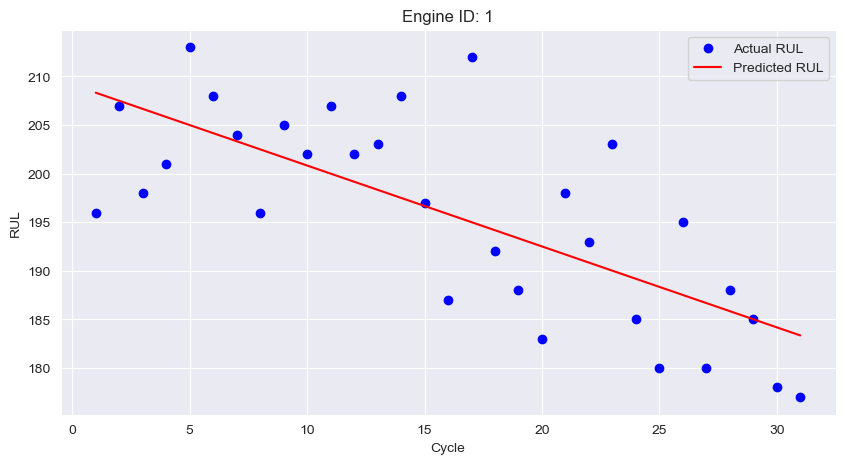

Slope: -0.8322580645161287, Intercept: 209.15483870967742


In [33]:
# Method 2: linear Regression
# Function to model and plot RUL for a given engine
def lr_model_and_plot(engine_id, data):
    # Filter data for the specified engine_id
    engine_data = data[data['engine_id'] == engine_id]
    
    # Prepare the data for regression
    X = engine_data['cycle'].values.reshape(-1, 1)
    y = engine_data['RUL'].values
    
    # Create a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict using the model
    predictions = model.predict(X)
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y, color='blue', label='Actual RUL')
    plt.plot(X, predictions, color='red', label='Predicted RUL')
    plt.title(f'Engine ID: {engine_id}')
    plt.xlabel('Cycle')
    plt.ylabel('RUL')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Return the slope and intercept
    return model.coef_[0], model.intercept_

# As an example we can look at the relationship between RULs and cycles at engine_id = 1
slope, intercept = lr_model_and_plot(1, dataset2)

print(f"Slope: {slope}, Intercept: {intercept}")

The slope of the predicted RUL is negative as expected. We can use this model to predict the RUL at the last observed cycle and compute a single RUL value.

In [34]:
def predict_RUL_at_last_cycle(df):
    """
    Perform linear regression for each engine and predict RUL at the last observed cycle.

    Parameters:
    df (DataFrame): DataFrame containing engine data with columns 'engine_id', 'cycle', and 'RUL'

    Returns:
    DataFrame: A DataFrame containing 'engine_id' and the predicted RUL at the last cycle.
    """
    
    # Initialize an empty list to store results
    predictions = []
    # Loop through each unique engine_id
    for engine_id in df['engine_id'].unique():
        # Filter data for the specified engine_id
        engine_data = df[df['engine_id'] == engine_id]
        
        # Prepare the data for regression
        X = engine_data['cycle'].values.reshape(-1, 1)
        y = engine_data['RUL'].values
        
        # Create a linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Find the last observed cycle for this engine
        last_cycle = np.array(engine_data['cycle'].max()).reshape(-1, 1)
        
        # Predict RUL_predicted for the last cycle
        lr_model_rul = model.predict(last_cycle)

        # Store the result as a tuple of engine_id and predicted RUL_predicted
        predictions.append((engine_id, int(lr_model_rul[0])))

    # Convert the predictions list to a DataFrame
    lr_model_df = pd.DataFrame(predictions, columns=['id', 'RUL'])

    return lr_model_df

# Predict RUL at the last cycle for each engine in the merged_data DataFrame
lr_model_df = predict_RUL_at_last_cycle(dataset2)

# Merge the datasets on the 'engine_id' column
merged_data = pd.merge(lr_model_df, dataset3, on='id',
                       how='inner', suffixes=('_predicted', '_consultancy'))

merged_data

id  RUL_predicted  RUL_consultancy
0     1            183              135
1     2            152              125
2     3             67               63
3     4             93              100
4     5            102              103
..  ...            ...              ...
95   96            130              140
96   97             92              109
97   98             79               87
98   99            138              127
99  100             33               24

[100 rows x 3 columns]

In [35]:
# Extract the RUL columns
lr_model_rul = merged_data['RUL_predicted']
consultancy_rul = merged_data['RUL_consultancy']

# Calculate metrics
mae = mean_absolute_error(lr_model_rul, consultancy_rul)
mse = mean_squared_error(lr_model_rul, consultancy_rul)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(lr_model_rul, consultancy_rul)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 18.95
Mean Squared Error (MSE): 547.05
Root Mean Squared Error (RMSE): 23.3891000254392
Mean Absolute Percentage Error (MAPE): 0.2604233696921349


Linear regression model has a lower error in every metric.

In [36]:
# Perform statistical tests
# Paired t-test
t_stat, p_value_ttest = ttest_rel(lr_model_rul, consultancy_rul)
print(f"Paired t-test: t-statistic = {t_stat}, p-value = {p_value_ttest}")


# Analysis and discussion
if p_value_ttest < 0.05:
    print("The paired t-test indicates a statistically significant difference between the predictions.")
else:
    print("The paired t-test indicates no statistically significant difference between the predictions.")



Paired t-test: t-statistic = 3.4740614765023015, p-value = 0.0007620664765047007
The paired t-test indicates a statistically significant difference between the predictions.


### We save our predictions to a csv file to use in the optimization task.

In [37]:
# Save the lr_model predictions
lr_model_df.to_csv('predicted_RUL_dataset2.csv', index=False)

# 2. Optimization Task
## 2.1 Genetic Algorithm

In [38]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import time

In [39]:
# # Get the current working directory
# current_directory = os.getcwd()
# # Construct the relative path to prediction RUL file
# prediction_rul_filename = "predicted_RUL_dataset2.csv"
# prediction_file_path = os.path.join(current_directory, prediction_rul_filename)
# 
# # Read the CSV file
# rul_df = pd.read_csv(prediction_file_path, delimiter=',')
# rul_df

rul_df = lr_model_df.copy()
rul_df

id  RUL
0     1  183
1     2  152
2     3   67
3     4   93
4     5  102
..  ...  ...
95   96  130
96   97   92
97   98   79
98   99  138
99  100   33

[100 rows x 2 columns]

In [40]:
# Define constants
M = 100 # number of engines
G = 4 # Total number of teams (2 type A, 2 type B)
T = 30 # Planning horizon in days
MAX_DAILY_COST = 250
INVALID_PENALTY = 10000

In [41]:
# Define maintenance times for teams A and B
maintenance_duration_a = [4 if i < 20 else 3 if 20 <= i < 55 else 2 if 55 <= i < 80 else 8 for i in range(1, M + 1)]
maintenance_duration_b = [time_a + 1 if i < 25 else time_a + 2 if 25 <= i < 70 else time_a + 1 for i, time_a in enumerate(maintenance_duration_a, start=1)]


# Define engine costs
engine_costs = [4 if i < 21 else 3 if 21 <= i < 31 else 2 if 31 <= i < 46 else 5 if 46 <= i < 81 else 6 for i in range(1, M + 1)]

We start with a function to create feasible individuals. We randomly select valid engine ids that has a lower RUL than T=30, randomly assign a valid team and randomly select a valid start day. An individual is list of tuples consists of: engine_index, team_type (A or B), and the maintenance start_day. The best individual is converted to a schedule with a function. 

engine_id = engine_index + 1

In [42]:
def generate_random_schedule(T):
    individual = []
    
    # Track the availability of each team (A and B) on each day
    team_availability = {day: {'A': 0, 'B': 0} for day in range(1, T + 1)}

    # Apply filter to  allocate teams to engines that have a predicted safety due date of less than T = 30.
    filtered_df = rul_df[rul_df['RUL'] <= T].copy()
    engine_ids = list(filtered_df['id'])
    random.shuffle(engine_ids)

    # Randomly assign teams to engines within the planning horizon
    for engine_id in engine_ids:
        engine_index = engine_id - 1
        team_type = np.random.choice(['A', 'B'])  # Assume team type is A for this example

        # Determine maintenance duration based on team type
        maintenance_days = maintenance_duration_a[engine_index] if team_type == 'A' else maintenance_duration_b[engine_index]
        valid_start_dates = []

        # Search for valid start dates with continuous available days for maintenance duration
        for start_day in range(1, T - maintenance_days + 2):
            is_valid = True
            for day in range(start_day, start_day + maintenance_days):
                if team_availability[day][team_type] >= 2:  # Check if max team limit is exceeded on any day
                    is_valid = False
                    break
            if is_valid:
                valid_start_dates.append(start_day)

        if not valid_start_dates:
            continue

        start_day = np.random.choice(valid_start_dates)
        end_day = start_day + maintenance_days - 1

        # Update team availability for the selected team and days
        for day in range(start_day, end_day + 1):
            team_availability[day][team_type] += 1

        # Append to individual list
        individual.append((engine_index, team_type, start_day))

    return individual

In [43]:
# Define the problem as a minimization problem
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Initialization functions for individual and population.
def init_individual(T):
    return creator.Individual(generate_random_schedule(T))

def init_population(size, T):
    return [init_individual(T) for _ in range(size)]

# Calculates penalty cost per engine
def calculate_penalty(engine_index, team_type, start_day,):
    RUL = rul_df.loc[engine_index, 'RUL']
    safety_due_date = RUL
    maintenance_days = maintenance_duration_a[engine_index] if team_type == 'A' else maintenance_duration_b[engine_index]
    end_day = start_day + maintenance_days - 1
    penalty = 0

    if end_day > safety_due_date:
        overdue_days = end_day - safety_due_date
        penalty = min(MAX_DAILY_COST, engine_costs[engine_index] * overdue_days ** 2)

    return penalty

# Define the fitness function.
def evaluate(individual):
    """Fitness function for the individual. Returns total penalty cost for the individual"""
    total_penalty = 0
    for engine_index, team_type, start_day in individual:
        penalty = calculate_penalty(engine_index, team_type, start_day)
        total_penalty += penalty

    return (total_penalty,)

# Check invalid individuals and apply soft constraints.
def feasible(individual):
    """Feasibility function for the individual. Returns True if feasible False
    otherwise."""
    team_availability = {day: {'A': 0, 'B': 0} for day in range(1, T + 1)}
    unique_engines = set()
    # Constraints:
    for engine_index, team_type, start_day in individual:
        # An engine can be maintained at most once.
        if engine_index in unique_engines:
            return False

        maintenance_days = maintenance_duration_a[engine_index] if team_type == 'A' else maintenance_duration_b[engine_index]
        end_day = start_day + maintenance_days - 1
        
        # Incomplete schedules are not allowed. 
        if end_day > T:
            return False
        
        # A team can maintain one engine at a time
        for day in range(start_day, end_day + 1):
            if team_availability[day][team_type] >= 2:
                return False
            team_availability[day][team_type] += 1

        unique_engines.add(engine_index)

    return True

In [44]:
# Initiate the toolbox and register the functions.
toolbox = base.Toolbox()
toolbox.register("individual", init_individual, T=T)
toolbox.register("population", init_population, size=1000, T=T)
toolbox.register("evaluate", evaluate)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, INVALID_PENALTY))
# toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.7)
toolbox.register("select", tools.selTournament, tournsize=3)

In [45]:
# Create the population
pop = toolbox.population(size=1000, T=T)
# Hall of Fame and Statistics
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)

# Evolution parameters
ngen = 70  # Generations

# Register statistics
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)


pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.1,
                                   ngen=ngen, stats=stats, halloffame=hof)

# Display results
print("Best individual is:", hof[0], hof[0].fitness.values)

gen	nevals	avg      	std           	min 	max    
0  	1000  	[610.917]	[227.34785266]	[0.]	[1492.]
1  	630   	[5959.752]	[4729.80451589]	[0.]	[10000.]
2  	653   	[6975.158]	[4472.05098887]	[0.]	[10000.]
3  	647   	[7380.486]	[4297.40806438]	[0.]	[10000.]
4  	635   	[7518.156]	[4232.14849877]	[0.]	[10000.]
5  	647   	[7739.888]	[4113.02495318]	[0.]	[10000.]
6  	638   	[7792.295]	[4086.45697885]	[0.]	[10000.]
7  	621   	[7763.914]	[4115.30205825]	[0.]	[10000.]
8  	613   	[7623.526]	[4206.61510235]	[0.]	[10000.]
9  	702   	[8002.585]	[3958.44224826]	[0.]	[10000.]
10 	662   	[8193.455]	[3817.69266128]	[0.]	[10000.]
11 	638   	[8088.996]	[3908.11091398]	[0.]	[10000.]
12 	652   	[8044.163]	[3949.03309589]	[0.]	[10000.]
13 	654   	[7873.189]	[4076.33023923]	[0.]	[10000.]
14 	665   	[8109.493]	[3903.67508765]	[0.]	[10000.]
15 	614   	[7539.842]	[4295.70685255]	[0.]	[10000.]
16 	623   	[7437.119]	[4357.81982244]	[0.]	[10000.]
17 	648   	[7195.11] 	[4486.74278]   	[0.]	[10000.]
18 	613   	[6784.6

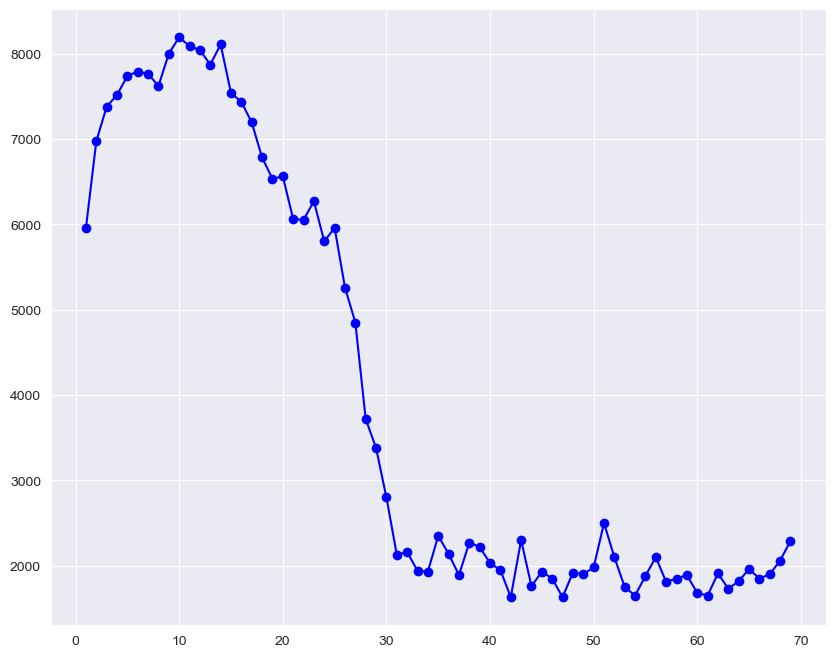

In [46]:
# History AVG
plt.figure(figsize=(10,8))
front = np.array([(c['gen'], c['avg'][0]) for c in logbook])
plt.plot(front[:,0][1:-1], front[:,1][1:-1], "-bo")
plt.axis("tight")
plt.show()

In [47]:
def convert_best_individual_to_schedule(individual):
    schedule = []
    for engine_index, team_type, start_day in individual:
        engine_id = engine_index + 1
        maintenance_days = maintenance_duration_a[engine_index] if team_type == 'A' else maintenance_duration_b[engine_index]
        end_day = start_day + maintenance_days - 1
        RUL = rul_df.loc[engine_index, 'RUL']
        penalty_cost = calculate_penalty(engine_index, team_type, start_day)
        total_penalty_cost = evaluate(individual)[0]
        schedule.append({
            'RUL': RUL,
            'Engine_id': engine_id,
            'Team': team_type,
            'Start_date': start_day,
            'End_date': end_day,
            'Penalty_cost': penalty_cost,
            'Total_penalty_cost': total_penalty_cost
        })

    return pd.DataFrame(schedule)

## 2.2 Optimization
### 2.2.1 Run the Genetic Algorithm for a total runtime of max. 5 minutes and report on the best found solution.

In [48]:
def run_ga(t):
    """Runs the genetic algorithm for the given time period (seconds). and outputs the best individual, best fitness value tuple"""
    start_time = time.time()
    elapsed_time = 0
    best_individuals = []
    best_fitness_values = []

    while elapsed_time < t: # 5 minutes
        pop = toolbox.population(size=1000, T=T)
        hof = tools.ParetoFront()
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean, axis=0)
        stats.register("std", np.std, axis=0)
        stats.register("min", np.min, axis=0)
        stats.register("max", np.max, axis=0)
        
        pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.1,
                                   ngen=ngen, stats=stats, halloffame=hof)
        
        if hof:
            current_best_individual = hof[0]
            current_best_fitness = hof[0].fitness.values[0]
            best_individuals.append(current_best_individual)
            best_fitness_values.append(current_best_fitness)

        elapsed_time = time.time() - start_time
    
    # Select the best of the best individuals
    best_index = np.argmin(best_fitness_values)
    best_individual = best_individuals[best_index]
    best_fitness = best_fitness_values[best_index]

    return best_individual, best_fitness

In [49]:
# Run the ga for max 5 minutes 
t_in_seconds = 240 # 4 minutes
best_individual, best_fitness = run_ga(t_in_seconds)

print(f"\nBest individual: {best_individual}\nFitness: {best_fitness}")

gen	nevals	avg      	std          	min 	max    
0  	1000  	[612.797]	[227.9746341]	[2.]	[1466.]
1  	646   	[6033.751]	[4719.87414631]	[2.]	[10000.]
2  	598   	[6427.169]	[4653.1113198] 	[2.]	[10000.]
3  	632   	[6887.173]	[4517.79275256]	[2.]	[10000.]
4  	668   	[7474.4]  	[4261.44961979]	[2.]	[10000.]
5  	655   	[7665.054]	[4155.5920316] 	[2.]	[10000.]
6  	651   	[7689.655]	[4145.8023619] 	[2.]	[10000.]
7  	614   	[7655.101]	[4173.209061]  	[2.]	[10000.]
8  	633   	[7884.733]	[4030.32005872]	[2.]	[10000.]
9  	664   	[8182.201]	[3815.7281741] 	[2.]	[10000.]
10 	666   	[8219.929]	[3786.81983622]	[2.]	[10000.]
11 	659   	[8120.21] 	[3869.05997652]	[2.]	[10000.]
12 	640   	[8129.44] 	[3862.55481571]	[2.]	[10000.]
13 	642   	[7949.423]	[4001.67955914]	[2.]	[10000.]
14 	633   	[7790.156]	[4113.42480029]	[2.]	[10000.]
15 	647   	[7866.553]	[4064.87664944]	[2.]	[10000.]
16 	650   	[7834.293]	[4090.11403254]	[2.]	[10000.]
17 	614   	[7674.38] 	[4196.34384764]	[2.]	[10000.]
18 	658   	[7570.671

### 2.2.2 The best individual will be converted to a schedule that contains: (i) a list of all machines, indicating for any maintained machine the type of the team doing the maintenance, start-date, and end-date of the maintenance, as well as the penalty costs incurred by that machine; (ii) the total penalty costs.

In [50]:

schedule_df = convert_best_individual_to_schedule(best_individual)

schedule_df

RUL  Engine_id Team  Start_date  End_date  Penalty_cost  \
0    16         66    B           4         7             0   
1    25         76    A          18        19             0   
2    21         92    B           7        15             0   
3    15         91    A           8        15             0   
4    29         68    A           2         3             0   
5    14         56    B           1         4             0   
6    12         35    A           4         6             0   
7    30         36    B          20        24             0   
8    29         24    A          13        15             0   
9    20         81    B           8        16             0   
10   19         31    A           8        10             0   

    Total_penalty_cost  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
5                    0  
6                    0  
7                    0  
8                    0  
9                    0  
10                   0

### 2.2.3 Run the algorithm 30 times for at most 5 minutes, and plot the average-best-fitness.

In [51]:
def plot_average_best_fitness(num_runs, t_in_seconds):
    """ Runs the genetic algorithm for the given number of runs and time period (seconds) and plots the average fitness value"""
    best_individuals = []
    best_fitness_values = []
    
    # Loop over the num_runs times and collect best fitness values
    for _ in range(num_runs):
        best_individual, best_fitness = run_ga(t_in_seconds)
        best_individuals.append(best_individual)
        best_fitness_values.append(best_fitness)
    
    # Select the best of the best individuals
    best_index = np.argmin(best_fitness_values)
    overall_best_individual = best_individuals[best_index]
    overall_best_fitness = best_fitness_values[best_index]
    
    # Calculate the average best fitness
    average_best_fitness = np.mean(best_fitness_values)
    
    # Plot the average best fitness
    plt.figure(figsize=(10, 6))
    plt.plot(best_fitness_values, marker='o', linestyle='-', color='b', label='Best Fitness per Run')
    plt.axhline(y=average_best_fitness, color='r', linestyle='--', label=f'Average Best Fitness: {average_best_fitness:.2f}')
    plt.xlabel('Run Number')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness per Run and Average Best Fitness over 30 Runs')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print the average best fitness
    print(f"Average Best Fitness over {num_runs} runs: {average_best_fitness:.2f}")
    
    return overall_best_individual, overall_best_fitness

gen	nevals	avg     	std           	min 	max    
0  	1000  	[600.23]	[223.95149274]	[6.]	[1466.]
1  	641   	[5988.63]	[4724.65293552]	[6.]	[10000.]
2  	650   	[6881.229]	[4505.75244067]	[6.]	[10000.]
3  	620   	[7317.062]	[4324.50823356]	[6.]	[10000.]
4  	653   	[7599.505]	[4180.78740239]	[14.]	[10000.]
5  	599   	[7554.598]	[4213.76754276]	[14.]	[10000.]
6  	614   	[7369.609]	[4325.83187516]	[14.]	[10000.]
7  	639   	[7380.609]	[4329.56424783]	[14.]	[10000.]
8  	691   	[7922.853]	[4005.02976161]	[14.]	[10000.]
9  	602   	[7657.139]	[4181.03014862]	[14.]	[10000.]
10 	639   	[7722.798]	[4143.57990356]	[14.]	[10000.]
11 	624   	[7648.468]	[4196.35729591]	[14.]	[10000.]
12 	659   	[7693.91] 	[4172.5829444] 	[14.]	[10000.]
13 	636   	[7485.27] 	[4298.54030074]	[8.] 	[10000.]
14 	596   	[7255.374]	[4423.32528061]	[8.] 	[10000.]
15 	606   	[7260.564]	[4425.92303457]	[8.] 	[10000.]
16 	664   	[7336.605]	[4390.64656935]	[8.] 	[10000.]
17 	628   	[7204.933]	[4460.06539375]	[8.] 	[10000.]
18 	652

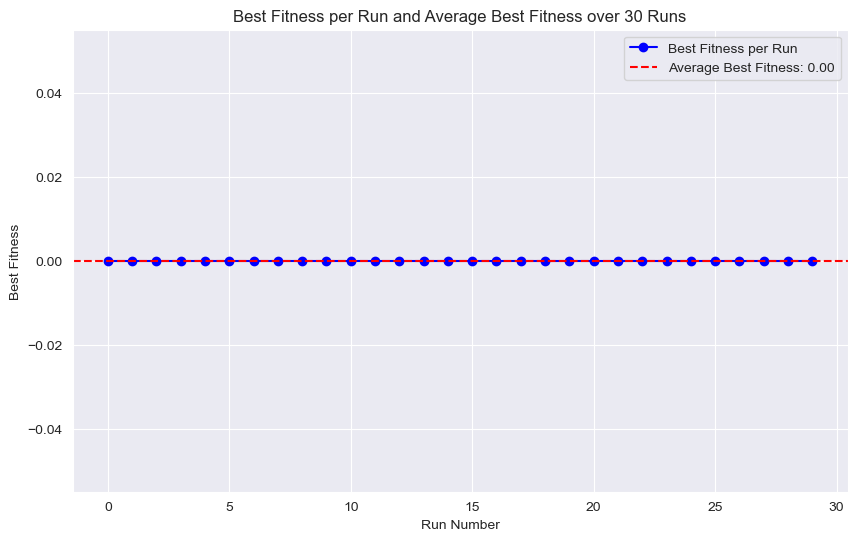

Average Best Fitness over 30 runs: 0.00

Best individual: [(23, 'B', 25), (90, 'B', 2), (55, 'A', 7), (30, 'B', 12), (67, 'A', 18), (35, 'A', 20), (80, 'B', 4), (65, 'A', 5), (75, 'B', 20), (34, 'A', 8), (91, 'B', 13)]
Fitness: 0.0

Schedule:


RUL  Engine_id Team  Start_date  End_date  Penalty_cost  \
0    29         24    B          25        28             0   
1    15         91    B           2        10             0   
2    14         56    A           7         8             0   
3    19         31    B          12        16             0   
4    29         68    A          18        19             0   
5    30         36    A          20        22             0   
6    20         81    B           4        12             0   
7    16         66    A           5         6             0   
8    25         76    B          20        22             0   
9    12         35    A           8        10             0   
10   21         92    B          13        21             0   

    Total_penalty_cost  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
5                    0  
6                    0  
7                    0  
8                    0  
9                    0  
10                   0

In [53]:
num_runs = 30
# Run the ga 30 times for 5 minutes and plot the average-fitness-values
overall_best_individual, overall_best_fitness = plot_average_best_fitness(num_runs, t_in_seconds)

print(f"\nBest individual: {overall_best_individual}\nFitness: {overall_best_fitness}")

# Create a schedule from the overall best individual
schedule_df = convert_best_individual_to_schedule(overall_best_individual)
print("\nSchedule:")
schedule_df


## 2.3 Comparison
Run the Genetic Algorithm on the same problem, but with the RUL predictions of the consultancy company. Run it 30 times for at most 5 minutes, and plot the average-best-fitness.


In [54]:
# Construct the relative path to prediction RUL file
rul_filename = "RUL_consultancy_predictions_A3-2.csv"
rul_path = os.path.join(current_directory, rul_filename)

# Read the CSV file
rul_df = pd.read_csv(rul_path, delimiter=';')
rul_df

RUL   id
0   135    1
1   125    2
2    63    3
3   100    4
4   103    5
..  ...  ...
95  140   96
96  109   97
97   87   98
98  127   99
99   24  100

[100 rows x 2 columns]

gen	nevals	avg       	std           	min   	max    
0  	1000  	[1463.227]	[331.47314744]	[443.]	[2587.]
1  	620   	[6278.392]	[4358.40225385]	[443.]	[10000.]
2  	636   	[7260.331]	[4118.03721904]	[443.]	[10000.]
3  	667   	[7744.9]  	[3897.17110607]	[443.]	[10000.]
4  	654   	[7747.674]	[3902.38515394]	[443.]	[10000.]
5  	658   	[7891.855]	[3826.12478416]	[443.]	[10000.]
6  	624   	[7905.039]	[3823.62264292]	[443.]	[10000.]
7  	689   	[8384.856]	[3471.83488652]	[443.]	[10000.]
8  	658   	[8306.952]	[3542.73876792]	[443.]	[10000.]
9  	652   	[8269.557]	[3573.78481847]	[443.]	[10000.]
10 	639   	[8297.004]	[3551.77293165]	[443.]	[10000.]
11 	636   	[8257.293]	[3599.03951536]	[443.]	[10000.]
12 	638   	[8151.837]	[3685.6627619] 	[443.]	[10000.]
13 	654   	[8222.646]	[3635.10468387]	[443.]	[10000.]
14 	630   	[8277.677]	[3592.07196986]	[443.]	[10000.]
15 	648   	[7991.958]	[3804.21746779]	[443.]	[10000.]
16 	643   	[7928.861]	[3856.01785443]	[443.]	[10000.]
17 	665   	[7902.608]	[3882.4709

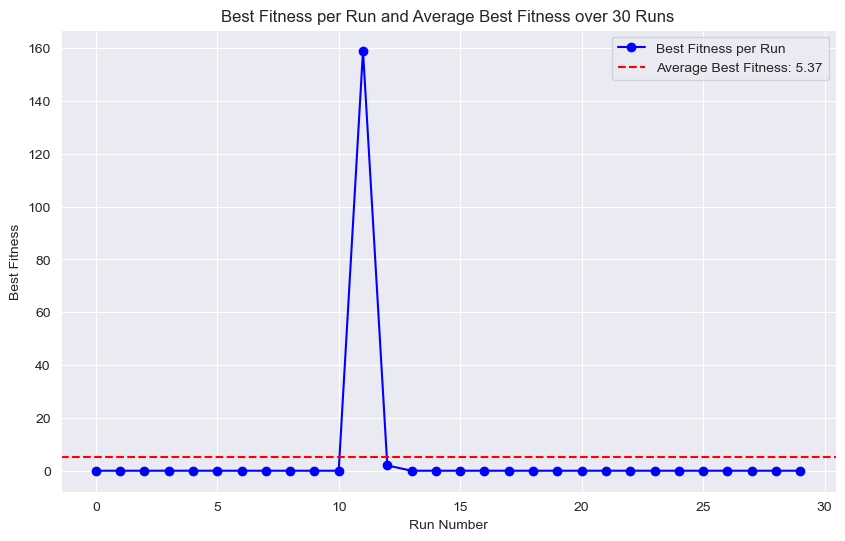

Average Best Fitness over 30 runs: 5.37

Best individual: [(63, 'B', 19), (48, 'A', 11), (35, 'B', 12), (89, 'B', 2), (90, 'A', 6), (19, 'A', 6), (60, 'A', 4), (55, 'A', 17), (36, 'B', 3), (40, 'A', 18), (65, 'A', 4), (23, 'B', 18), (76, 'B', 10)]
Fitness: 0.0

Schedule:


RUL  Engine_id Team  Start_date  End_date  Penalty_cost  \
0    24         64    B          19        22             0   
1    14         49    A          11        13             0   
2    24         36    B          12        16             0   
3    28         90    B           2        10             0   
4    29         91    A           6        13             0   
5    10         20    A           6         8             0   
6    23         61    A           4         5             0   
7    18         56    A          17        18             0   
8    21         37    B           3         7             0   
9    23         41    A          18        20             0   
10   18         66    A           4         5             0   
11   26         24    B          18        21             0   
12   27         77    B          10        12             0   

    Total_penalty_cost  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
5                    0  
6                    0  
7                    0  
8                    0  
9                    0  
10                   0  
11                   0  
12                   0

In [55]:
# Run the ga 30 times for 5 minutes and plot the average-fitness-values
overall_best_individual, overall_best_fitness = plot_average_best_fitness(num_runs, t_in_seconds)

print(f"\nBest individual: {overall_best_individual}\nFitness: {overall_best_fitness}")

# Create a schedule from the overall best individual
schedule_df = convert_best_individual_to_schedule(overall_best_individual)
print("\nSchedule:")
schedule_df
